## Assignment 5: Multivariate exploratory visualization

In Assignment 4, you got a feel for the basic analytic capabilites of `pandas` and `seaborn`, and learned how to calculate descriptive statistics and generate univariate plots.  In many cases, however, you are going to want to explore interrelationships between multiple characteristics of your data.  In this course, we are going to address this with __multivariate exploratory visualization__.  

Multivariate visualization can take a lot of forms, and can get quite complex!  We're just going to start with the basics here and work our way up to more complicated visualizations - and fortunately `seaborn` can do quite a lot of things.  

Our data for today's notebook are going to come from the 2012-2016 __American Community Survey__.  The American Community Survey, or ACS, is an annual survey conducted by the US Census Bureau that covers demographic characteristics of the US population such as income, education, and much more.  

To get started, download the required data for this assignment from TCU Online, then upload the data to Colab.  Run the cell below to load the required packages and data for this assignment, which are for counties in New Mexico.    

In [1]:
import pandas as pd
import seaborn as sns

# Assumes the data are in local session storage; 
# modify if the data are in your Drive
nm = pd.read_csv("data/new_mexico.csv")

nm.head()

,county,hhincome,pct_college,median_age
0,Bernalillo,48994.0,32.8,36.8
1,Catron,38142.0,24.8,58.1
2,Chaves,41356.0,19.3,35.1
3,Cibola,36160.0,12.4,35.8
4,Colfax,32693.0,22.1,48.3


We note that our dataset has four columns: `"county"`, for the county name; `"hhincome"`, which refers to the median annual income for households in the county; `"pct_college"`, which refers to the percent of the population age 25 and up with at least a 4-year degree; and `"median_age"`, which refers to the median age of county residents.

### Bar charts and dot plots

Two common types of charts for comparing quantities, as we discussed in class, are bar charts and dot plots.  __Bar charts__ represent values as proportional to the height of bars, and __dot plots__ represent values as dots along a given axis.  

Many plot types are available in `pandas` through the built-in `.plot()` data frame method, and also have equivalent functions in `seaborn`.  In `pandas` plotting, if no data arguments are passed to the `plot` method, `pandas` will assume that the x-axis values are in the index, and then will plot numeric columns as data series.  For example, we can create a bar plot below.  Also notice the use of the `sns.set()` function.  Within `seaborn`, you can choose from a variety of built-in plot templates: `"white"`, `"dark`", `"darkgrid"`, `"whitegrid"`, and `"ticks"`, and you can use the `set` function to make all of your plots in this particular style.  

Additionally, we can modify underlying figure characteristics with the `rc` parameter in `sns.set()`. This allows you to specify the output figure width and height in inches; the code below will tell seaborn to make 10 inch by 8 inch plots, which will be more legible than the defaults. 

In [2]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (10, 8)})

As we've covered in class, `seaborn` is an excellent choice for creating publication-quality plots with a minimum of code.  Bar charts in `seaborn` are available from the `barplot` function.  The function has a lot of optional parameters; however, to get a bar chart to display, all you need are columns to map onto the x and y axes, and a dataset you'd like to plot.  Let's try a horizontal bar plot with the county name on the y-axis and median age on the x-axis: 

<Axes: xlabel='median_age', ylabel='county'>

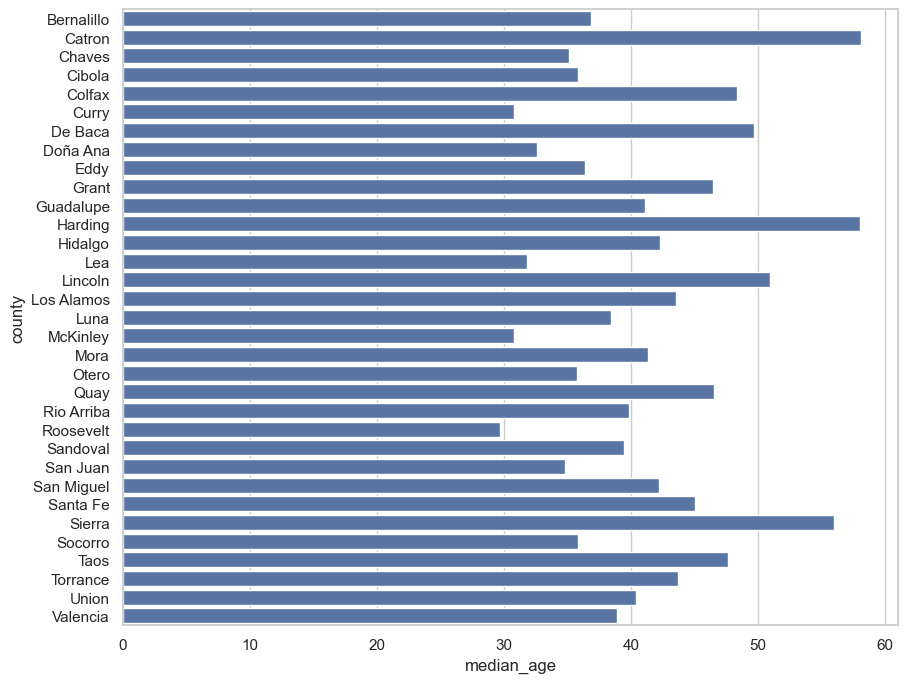

In [3]:
sns.barplot(x = 'median_age', y = 'county', data = nm)

Looks good!  There is much more you can do with the plot - customizing colors, axis labels, and beyond.  We'll be addressing plot customization beginning in Week 10.  However, there are still some small things that we can do to make our plots more readable.  Recall from class our discussion of the `.sort_values()` data frame method, in which we can arrange our data based on one or more column values.  When creating bar charts, it is a good idea to show sorted data values, which makes it easier for the reader to make comparisons.  

We have a few options here.  We could sort our data frame in place, then supply it to the `data` parameter of `barplot`: 

```python
nm.sort_values('median_age', ascending = False, inplace = True)
sns.barplot(x = 'median_age', y = 'county', data = nm)
```

We could create a new sorted data frame from the `sort` operation and use it instead: 

```python
nm_sorted = nm.sort_values('median_age', ascending = False)
sns.barplot(x = 'median_age', y = 'county', data = nm_sorted)
```

Or, we could tell `seaborn` to work with a sorted data frame within the function call.  

```python
sns.barplot(x = 'median_age', y = 'county', data = nm.sort_values('median_age', ascending = False))
```

All of these will work.  Recall that the `sort` method takes either a single column or a list of columns, and defaults to sorting in ascending order; if you want descending order you will need to tell the method `ascending = False`.  Let's try the second option I discussed.  

<Axes: xlabel='median_age', ylabel='county'>

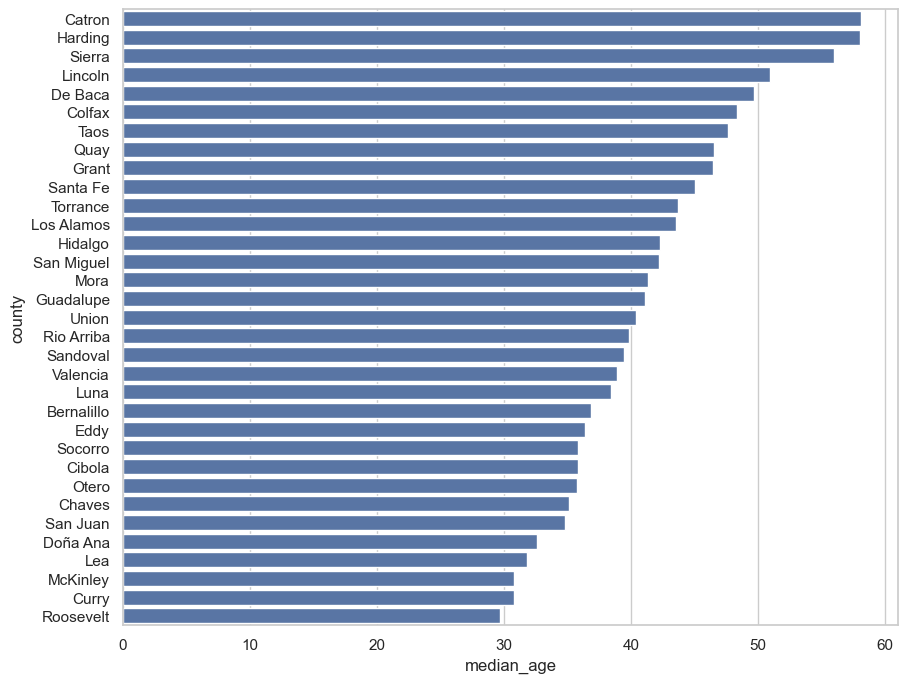

In [4]:
nm_sorted = nm.sort_values('median_age', ascending = False)
sns.barplot(x = 'median_age', y = 'county', data = nm_sorted)

Sorting the data allows us to more clearly see how the values vary.  However, as we discussed in class, it is essential that bar charts have an origin of 0, as bar heights are used to make comparisons.  For values that are similar - but for which the differences are still significant - the __dot plot__ may be preferable, which represents values by the position of dots along a a value axis.  Indeed, many data visualization experts prefer dot plots to bar charts, as they argue that it is easier for humans to perceive dot position instead of bar heights.  Further, dot plots are not constrained by the zero-axis-origin rule.  

Dot plots in `seaborn` are available via the `stripplot` function; for reference, "strip plot" is another name for dot plot.  The syntax you'll use is identical to `barplot` in this example aside from a `size` parameter that governs the size of the points on the plot.

<Axes: xlabel='median_age', ylabel='county'>

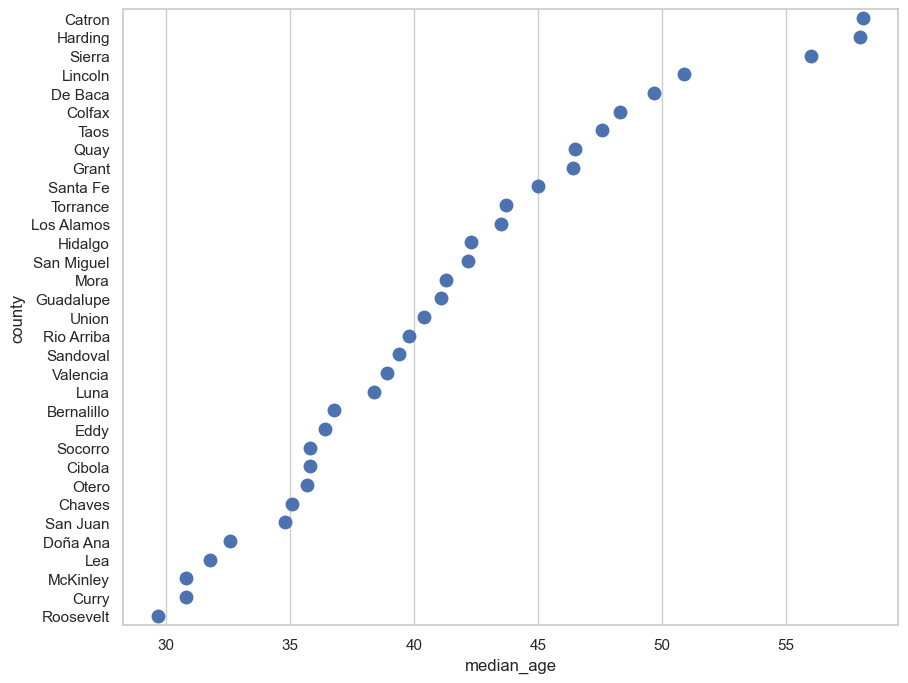

In [5]:
sns.stripplot(x = 'median_age', y = 'county', data = nm_sorted, size = 10)

### Scatter plots

Bar charts and dot plots are excellent choices for visualizing quantitative variations amongst different categories, like countries.  However: what if you want to visualize how two quantitative attributes might covary?  The most common exploratory visualization technique for this type of scenario is the __scatter plot__.  

Scatter plots most closely resemble the base __Cartesian coordinate system__ that underpins the charts we've learned how to make to this point.  In fact, scatter plots are likely familiar to you from grade-school mathematics in the way they represent the joint distributions of two attributes.  The value for one attribute is represented by the x-coordinate (the horizontal axis) on the chart, and the other attribute is represented by the y-coordinate (the vertical axis).  

Let's give this a try.  We'll be comparing the distributions of counties' educational attainment, as measured by the percentage of residents age 25 and up with at least a 4-year college degree, and the median annual income for households in New Mexico's counties.  Briefly, let's examine the characteristics of our data.  

In [6]:
nm.describe()

,hhincome,pct_college,median_age
count,33.000000,33.000000,33.000000
mean,40088.818182,21.384848,41.321212
std,15328.603075,10.455744,7.637193
min,21190.000000,9.500000,29.700000
25%,32067.000000,15.400000,35.800000
50%,36160.000000,18.100000,40.400000
75%,41788.000000,25.800000,46.400000
max,105902.000000,64.600000,58.100000


You can get a sense here of the wide variations among counties.  Median household income varies from \$21,190 to \$105,902; the percentage of residents age 25+ with a 4-year degree varies from 9.5 percent to 64.6 percent.

So how do these two distributions of values covary?  We can draw a scatterplot with __seaborn__: 

<Axes: xlabel='pct_college', ylabel='hhincome'>

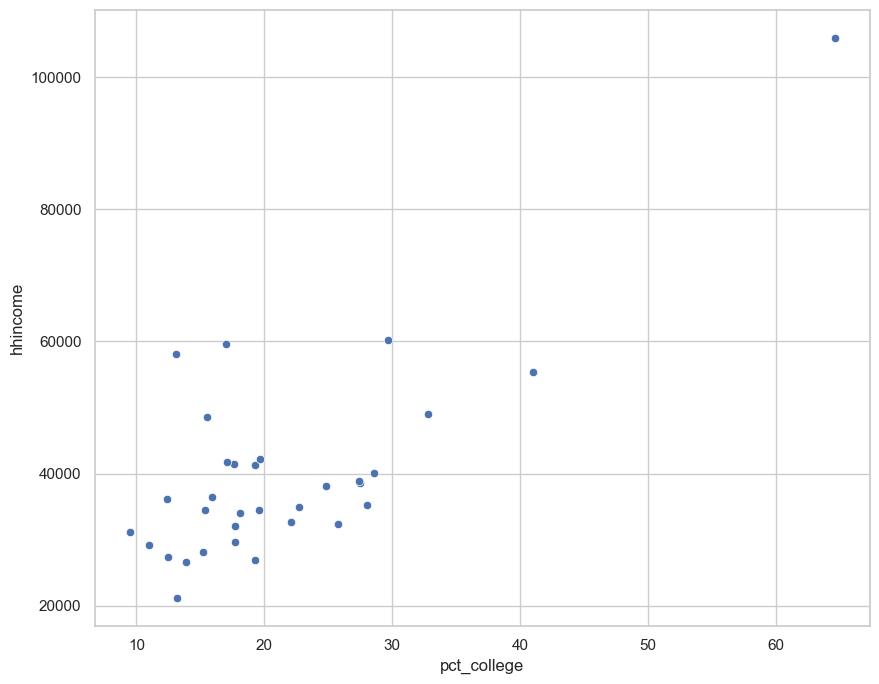

In [7]:
sns.scatterplot(x = 'pct_college', y = 'hhincome', data = nm)

Notice the shape formed by the distribution of dots.  It appears from our plot that as educational attainment increases, household income increases as well, suggesting a __positive relationship__ between the two distributions.  Recall from class that this statistical relationship can be quantified with a __correlation coefficient__.  Let's check this out by using the `.corr()` method available to us in `pandas`: 

In [8]:
nm['hhincome'].corr(nm['pct_college'])

0.7568558159158861

As we discussed in class, Pearson's correlation coefficient (which is used here) ranges between -1 and +1, with positive values suggestive of a positive correlation and vice versa.  This statistic conforms with what we see in the scatter plot.  However: remember to beware of spurious correlations!  We'll learn some more methods for investigating this graphically throughout the semester.  

Scatter plots are also available in `seaborn` with additional options. For example, we can try the `lmplot()` function (don't worry about the warning message): 

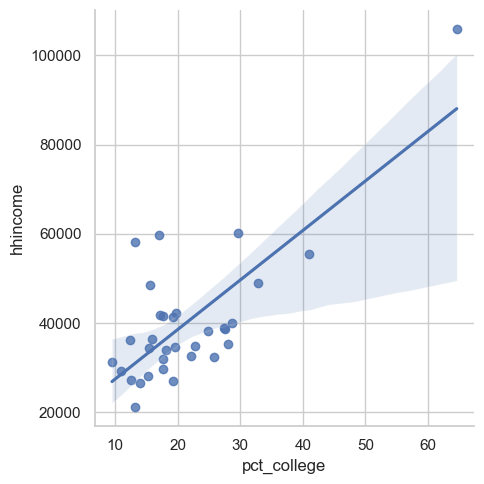

In [9]:
sns.lmplot(x = 'pct_college', y = 'hhincome', data = nm)

The plot is similar, but notice the superimposition of a __regression line__ over the dots.  You can think of this line as a visual representation of the correlation between the two variables; the upward slope, again, suggests a positive relationship.  This line also presumes that the relationship between the two variables is __linear__, which is not always the case; we'll discuss this a bit more later in the semester.  

`seaborn` also has additional options for drawing multi-dimensional plots.  You'll learn much more about this in the second half of the semester, but here's a preview of the `jointplot` function.  

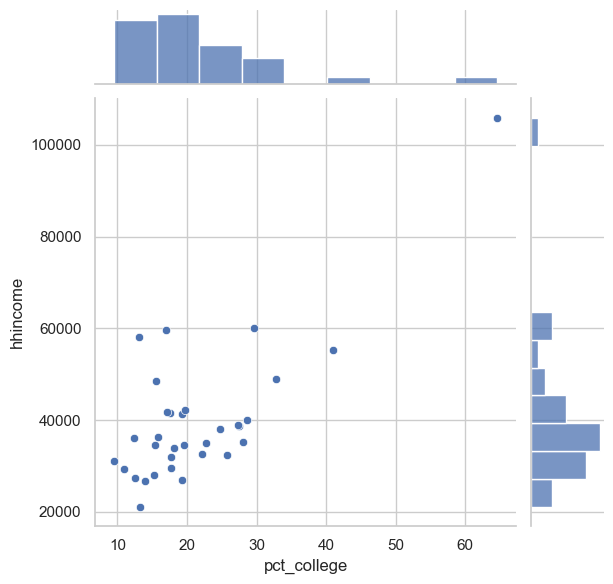

In [10]:
sns.jointplot(x = 'pct_college', y = 'hhincome', data = nm)

`seaborn` draws a scatter plot, but with histograms of the two data distributions on the margins!  Additionally, the `sns.scatterplot()` function can map other variables onto the hue, style, or size of the points drawn.  For example, we can visualize our relationship as we did before, but this time with dots sized by county median age:

<Axes: xlabel='pct_college', ylabel='hhincome'>

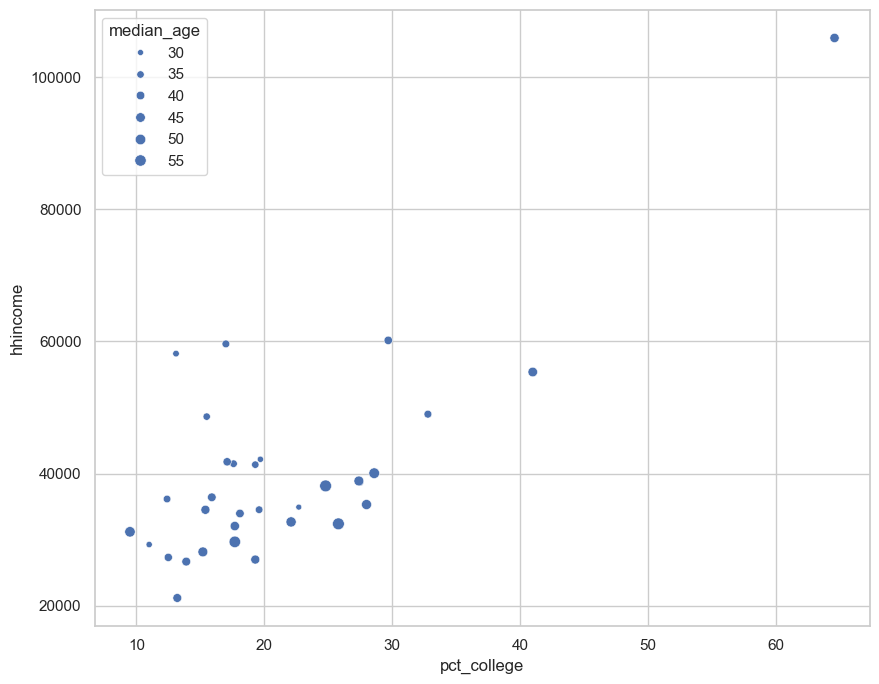

In [11]:
sns.scatterplot(x = 'pct_college', y = 'hhincome', size = "median_age", data = nm)

## Exercises

As usual, I'll ask you to do some of this on your own now in the form of a few small exercises.  Take care to answer all of the questions!  

__Exercise 1__: Explain, in your own words, the differences between a bar chart and a dot plot.  When might one of these charts be preferable to the other?  Write your response below in this Markdown cell.  

---

Exercises 2 and 3 will re-use the New Mexico data that the assignment's instructions were based on.  Answer the following questions: 

__Exercise 2__: Sort your data frame by median household income in descending order.  Which county in New Mexico has the lowest median household income?  Which county has the highest median household income?  

__Exercise 3__: Use `seaborn` to create either a dot plot or bar chart of the `"pct_college"` column for counties in New Mexico, with bars or dots sorted in descending order of educational attainment.

---

In Exercises 4 and 5, you are going to examine the (potential) relationship between the percentage of the population in poverty and the percentage of households with broadband internet access for counties in Texas with populations 65,000 and up.  This information comes from the 1-year American Community Survey for 2017.  

Use the cell below to read in the dataset `texas.csv`, which is located in your assignment folder.  

__Exercise 4__: Use `seaborn` to draw a scatter plot that shows the relationship between poverty rates and broadband internet access.  

__Exercise 5:__ Calculate the correlation coefficient for counties' poverty rates and broadband internet access.  What appears to be the relationship between the two variables?  Does this represent a _spurious_ correlation, in your opinion?